# Quantized rational projective plane via the Burau representation of $B_4$

## I - Burau representation

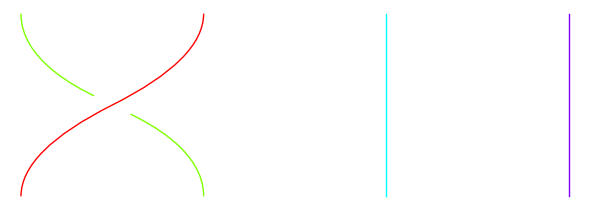

In [3]:
B.<s1,s2,s3> = BraidGroup(4)
s1.plot()

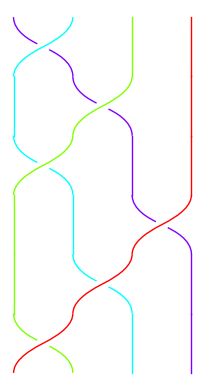

In [4]:
Delta = B([1,2,3,1,2,1])
Delta.plot()

In [5]:
# Conversion list <-> braid

def list_to_braid(l):
    l_without_zeros = []
    for a in l:
        if a != 0:
            l_without_zeros.append(a)
    return B(l_without_zeros)

def braid_to_list(beta):
    return list(beta.Tietze())

In [6]:
list_to_braid([1,1,2,-2,0,1,2,0])

s1^3*s2

In [7]:
# Burau representation at q=1 (integral Burau rho)

s1_burau = matrix(ZZ,[[1,1,0],[0,1,0],[0,0,1]])
s2_burau = matrix(ZZ,[[1,0,0],[-1,1,1],[0,0,1]])
s3_burau = matrix(ZZ,[[1,0,0],[0,1,0],[0,-1,1]])

def rho(beta):
    M = matrix(ZZ,[[1,0,0],[0,1,0],[0,0,1]])
    for c in braid_to_list(beta):
        if abs(c) == 1:
            M = M*s1_burau^(sign(c))
        elif abs(c) == 2:
            M = M*s2_burau^(sign(c))
        else:
            M = M*s3_burau^(sign(c))
    return M

In [8]:
print(rho(s1))
print(" ")
print(rho(Delta))

[1 1 0]
[0 1 0]
[0 0 1]
 
[ 0  0  1]
[ 0 -1  0]
[ 1  0  0]


In [9]:
# Burau representation rho_q

Zq.<q> = Frac(PolynomialRing(ZZ,'q'))


s1q = matrix(Zq,[[q,1,0],[0,1,0],[0,0,1]])
s2q = matrix(Zq,[[1,0,0],[-q,q,1],[0,0,1]])
s3q = matrix(Zq,[[1,0,0],[0,1,0],[0,-q,q]])

def rho_q(beta):
    M = matrix(Zq,[[1,0,0],[0,1,0],[0,0,1]])
    for c in braid_to_list(beta):
        if abs(c) == 1:
            M = M*s1q^(sign(c))
        elif abs(c) == 2:
            M = M*s2q^(sign(c))
        else:
            M = M*s3q^(sign(c))
    return M

In [10]:
rho_q(Delta)

[   0    0    q]
[   0 -q^2    0]
[ q^3    0    0]

## II - Orbits exploration algorithms

### Braided Euclidean Algorithm : version 1

In [11]:
# Input : three mutually prime integers x,y,z, with gcd(x-z,y) = n and x%n = m.
# Output : a braid beta such that rho(beta)([m:n:m]) = [x:y:z].

def algo1(x,y,z):
    if (x,y,z) == (1,0,1):
        return ([])
    # Build the list S that will become a braid
    S = []
    # Change x,y,z such that x,y,z > 0 and x < y and z < y
    if y < 0 :
        (x,y,z) = (-x,-y,-z)
    elif y == 0:
        y = abs(x-z)
        S = S + [-sign(x-z)*2]
    S = S + [sign(x)*1 for i in range(abs(x//y))]
    S = S + [-sign(z)*3 for i in range(abs(z//y))]
    x = x%y
    z = z%y
    # Main part of the algo
    while abs(x-z) > 0:
        # Reducing y using s2
        (p,r) = (y//abs(x-z),y%abs(x-z))
        if r == 0:
            S += [-sign(x-z)*2 for i in range((p-1))]
            y = abs(x-z)
        else:
            S += [-sign(x-z)*2 for i in range(p)]
            y = r
        # Reducing x and z using s1 and s3
        S += [1 for i in range(x//y)]
        S += [-3 for i in range((z//y))]
        x = x%y
        z = z%y
    return list_to_braid(S)

In [12]:
beta = algo1(5,15,-2)
print(beta)
print(" ")
print(rho(beta)*vector(ZZ,[0,1,0]))

s3*s2*s3^-1*s2^6*s1^5*s3^-6
 
(5, 15, -2)


### Version 2

In [13]:
# Input : three mutually prime integers x,y,z, with gcd(x-z,y) = n and x%n = m.
# Output : a braid beta such that rho(beta)([m:n:m]) = [x:y:z].

def algo2(x,y,z):
    if (x,y,z) == (1,0,1):
        return ([],[],[])
    S = []
    # Change y to have y > 0
    if y < 0 :
        (x,y,z) = (-x,-y,-z)
    elif y == 0:
        y = abs(x-z)
        S += [-sign(x-z)*2]
    # Change x,z to have x < y and z < y
    S += [sign(x)*1 for i in range(abs(x//y))]
    S += [-sign(z)*3 for i in range(abs(z//y))]
    x = x%y
    z = z%y
    # Main part
    while abs(x-z) > 0:
        # Reducing y (allowing y to become negative)
        v = abs(x-z)
        (p,r) = (y//v,y%v)
        if r == 0:
            S += [-sign(x-z)*2 for i in range(p-1)]
            y = v
        else:
            if (v-r) < r:
                S+=[-sign(x-z)*2 for i in range(p+1)]
                y = v-r
                x = -x
                z = -z
            else:
                S += [-sign(x-z)*2 for i in range(p)]
                y = r
        # Reducing x (allowing x to become negative)
        (p1,r1) = (x//y,x%y)
        if (y-r1) < r1:
            S += [sign(x)*1 for i in range(abs(p1+1))]
            x = r1-y
        else:
            S += [sign(x)*1 for i in range(abs(p1))]
            x = r1
        # Reducing z (allowing z to become negative)
        (p2,r2) = (z//y,z%y)
        if (y-r2) < r2:
            S += [-sign(z)*3 for i in range(abs(p2+1))]
            z = r2 - y
        else:
            S += [-sign(z)*3 for i in range(abs(p2))]
            z = r2
    return list_to_braid(S)

In [14]:
(r,s,t) = (9,10,2)
beta1 = algo1(r,s,t)
beta2 = algo2(r,s,t)
print(beta1)
print(beta2)
print(" ")
print(rho(beta2)*vector(ZZ,[0,1,0]))

s2^-1*s1^3*s2*s3^-2
s2^-1*s1^3*s3^-1*s2^-2*s3
 
(9, 10, 2)


## Generating examples

### Examples using the algo 1

In [15]:
# Auxiliary function normalizing a deformation [R:S:T] so that R, S and T are polynomials in q

def normalise(vq):
    k1 = (vq[0].denominator()).degree()
    k2 = (vq[1].denominator()).degree()
    k3 = (vq[2].denominator()).degree()
    k = max(k1,k2,k3)
    j1 = (vq[0].numerator()).valuation()
    j2 = (vq[1].numerator()).valuation()
    j3 = (vq[2].numerator()).valuation()
    j = min(j1,j2,j3)
    return ((q^(k-j)*vq[0]).numerator(),(q^(k-j)*vq[1]).numerator(),(q^(k-j)*vq[2]).numerator())


# Return one deformation of [r,s,t] in the orbit of [0:1:0] using the version 1 
# of the Braided Euclidean algorithm

def qdeformation(r,s,t):
    n = gcd(r-t,s)
    if n != 1:
        return "r-t and s must be coprime"
    M_q = rho_q(algo1(r,s,t))
    return normalise(M_q*vector(Zq,[0,1,0]))

In [16]:
qdeformation(3,2,2)

(q^2 + q + 1, q + 1, q + 1)

In [21]:
# Example of a deformation with negative coefficients

qdeformation(2,7,10)

(q^4 + q^3,
 -q^10 - q^9 - q^8 + q^6 + q^5 + 2*q^4 + 3*q^3 + 2*q^2 + q,
 -q^10 - q^9 - q^8 + q^6 + q^5 + 2*q^4 + 3*q^3 + 3*q^2 + 2*q + 1)

In [26]:
# Computation of one qdeformation for all [r:s:t] for 0 < r,s,t < N, with r-t coprime to s,
# using the version 1 of the algorithm

def examples(N):
    Exs = []
    for r in range(1,N):
        # Printing the progression
        if r%10 == 0:
            print(r)
        for s in range(1,N):
            for t in range(1,N):
                # Check [r,s,t] is in the orbit of [0:1:0]
                if gcd(r-t,s) == 1:
                    vq = qdeformation(r,s,t)
                    Exs.append(vq)
    return Exs

In [27]:
# WARNING : for N greater than 50 it becomes very very long to do the computations !

Exs = examples(20)
len(Exs)

10


4347

In [23]:
# Printing part of the examples computed above

def display(liste_exs):
    for vq in liste_exs:
        R = vq[0].numerator()
        S = vq[1].numerator()
        T = vq[2].numerator()
        print("couple = ",(R(1),S(1),T(1)))
        print("polynomes = ",(R,S,T))
        print(" ")

In [31]:
display(Exs[1000:1005])

couple =  (5, 8, 4)
polynomes =  (q^14 + q^13 + q^12 + q^11 + q^10, q^14 + 2*q^13 + 3*q^12 + 4*q^11 + 5*q^10 + 4*q^9 + 3*q^8 + q^7 - q^6 - 2*q^5 - 3*q^4 - 3*q^3 - 3*q^2 - 2*q - 1, q^10 + q^9 + q^8 + q^7)
 
couple =  (5, 8, 6)
polynomes =  (q^9 + q^8 + q^7 + q^6 + q^5, -q^16 - 2*q^15 - 3*q^14 - 4*q^13 - 4*q^12 - 4*q^11 - 3*q^10 - q^9 + q^8 + 3*q^7 + 5*q^6 + 6*q^5 + 5*q^4 + 4*q^3 + 3*q^2 + 2*q + 1, q^5 + q^4 + q^3 + q^2 + q + 1)
 
couple =  (5, 8, 8)
polynomes =  (q^4 + 2*q^3 + q^2 + q, q^4 + 2*q^3 + 2*q^2 + 2*q + 1, q^4 + 2*q^3 + 2*q^2 + 2*q + 1)
 
couple =  (5, 8, 10)
polynomes =  (q^4 + q^3 + 2*q^2 + q, q^4 + 2*q^3 + 3*q^2 + 2*q, q^4 + 2*q^3 + 3*q^2 + 3*q + 1)
 
couple =  (5, 8, 12)
polynomes =  (q^14 + q^13 + q^12 + q^11 + q^10, q^14 + 2*q^13 + 3*q^12 + 4*q^11 + 5*q^10 + 4*q^9 + 3*q^8 + q^7 - q^6 - 2*q^5 - 3*q^4 - 3*q^3 - 3*q^2 - 2*q - 1, q^14 + 2*q^13 + 3*q^12 + 4*q^11 + 5*q^10 + 5*q^9 + 4*q^8 + 2*q^7 - 2*q^5 - 3*q^4 - 3*q^3 - 3*q^2 - 2*q - 1)
 


### Examples of several deformations of the same point [r:s:t]

In [32]:
# Elements of the stabilizer of [0:1:0]
tau_1 = (s1*s2*s1)^2
tau_3 = (s3*s2*s3)^2
print(rho(tau_1))
print(" ")
print(rho(tau_3))

[-1  0  2]
[ 0 -1  0]
[ 0  0  1]
 
[ 1  0  0]
[ 0 -1  0]
[ 2  0 -1]


In [35]:
# Computation of many braids sending [0:1:0] to [r:s:t]
# We start using the algo 1 to get a braid beta_e 
# Then we add to the right of this braid many braids of the stabilizer of [0:1:0]
# The braids of the stabilizer are computed by conjugation of tau_1^2 or tau_3^2 
# by arbitrary braids of the form s2^b * s1^a * s3^c

def explore_fibre(r,s,t,nb_tau,borne_min,borne_max,nb_blocs):
    beta_e = algo1(r,s,t)
    Tresses1 = []
    Tresses0 = []
    # Future list of braids
    Good_braids = [beta_e]
    # Element of the stabilizer we will conjugate
    tau = tau_1^2
    for i in range(nb_tau):
        if i%2 == 0:
            tau = tau*tau_3^2
        else:
            tau = tau*tau_1^2
    # Building blocs s2^b * s1^a * s3^c
    for n in range(nb_blocs):
        print("n = ",n)
        for a in range(borne_min,borne_max):
            print(a)  #taking trace of the progression
            for b in range(borne_min,borne_max):
                for c in range(borne_min,borne_max):
                    beta = s2^b*s1^a*s3^c
                    if n == 0:
                        Tresses0.append(beta)
                        Good_braids.append(beta_e*beta*tau*beta^(-1))
                    else:
                        for gamma in Tresses0:
                            Tresses1.append(gamma*beta)
                            Good_braids.append(beta_e*gamma*beta*tau*beta^(-1)*gamma^(-1))
                        Tresses0 = Tresses1.copy()
                        Tresses1 = []
        print("---")
    return Good_braids

In [36]:
# With the list of braids computed above, we can compute many deformations of one point [r:s:t]

def Many_deformations(r,s,t,list_of_braids):
    Deformations = []
    k = 0
    for beta in list_of_braids:
        if k%200 == 0:
            print(k) # taking trace of the progression
        k+=1
        vq = normalise(rho_q(beta)*vector(Zq,[0,1,0]))
        Deformations.append((vq,beta))               
    return Deformations

In [38]:
# WARNING : computations become very long, choose low parameters first

(r,s,t) = (10,67,3)
Good_braids = explore_fibre(r,s,t,1,-3,3,2)
print(len(Good_braids))

n =  0
-3
-2
-1
0
1
2
---
n =  1
-3
-2
-1
0
1
2
---
46873


In [42]:
# WARNING : do not try to compute deformations for all the braids in Good_braids, 
# cut the list into small pieces of lenght lower than 1000.

Deformations = Many_deformations(r,s,t,Good_braids[:600])
print(len(Deformations))

0
200
400
600


In [49]:
# Looking for the minimal degree deformation inside all deformations computed above

degre_mini = (5000,5000,5000)
plus_petits = set([]) #set of deformations of minimal degree
degrees = [] #list of degrees 

for couple in Deformations:
    vq = couple[0]
    (k1,k2,k3) = (vq[0].degree(),vq[1].degree(),vq[2].degree())
    degrees.append(((k1,k2,k3),couple[1]))
    if k1<=degre_mini[0] and k2<=degre_mini[1] and k3<=degre_mini[2]:
        degre_mini = (k1,k2,k3)
        
# Display the minimal degrees
print(degre_mini)

# Find the deformation of minimal degree
for couple in Deformations:
    vq = couple[0]
    (k1,k2,k3) = (vq[0].degree(),vq[1].degree(),vq[2].degree())
    if k1 < degre_mini[0]:
        print("probleme de degre en R: ",couple)
    elif k2 < degre_mini[1]:
        print("probleme de degre en S: ",couple)
    elif k3 < degre_mini[2]:
        print("probleme de degre en T: ",couple)
    if (k1,k2,k3) == degre_mini:
        plus_petits.add(couple)

print(" ")
for x in plus_petits:
    print("deformation = ")
    print(x[0])
    print(" ")
    print("braid to reach it = ",x[1])

(12, 12, 10)
 
deformation = 
(q^12 + 2*q^11 + 3*q^10 + 3*q^9 + q^8, q^12 + 3*q^11 + 6*q^10 + 8*q^9 + 8*q^8 + 7*q^7 + 7*q^6 + 7*q^5 + 7*q^4 + 6*q^3 + 4*q^2 + 2*q + 1, q^10 + q^9 + q^8)
 
braid to reach it =  s2^-9*s1^2*s2^3*s1^2*s3^-3*s2*s3*(s1*s2*s1)^4*(s3*s2*s3)^3*s3
